# CHE1148 Assignment 4

#### YANBIN ZHANG 1008879732

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

### Import the data - Extract input and output  (output: the last column of the table)

In [2]:
data = pd.read_excel('data.xlsx', index_col=None, header=None)
input = data.drop([713], axis = 1)
output = data[713]

### Explore the input (1676 rows; 713 columns)

In [3]:
print(input.shape)

(1676, 713)


### The input is sparse. Let's plot the sparsity pattern (spy plot: blue $\neq$ 0, white = 0)

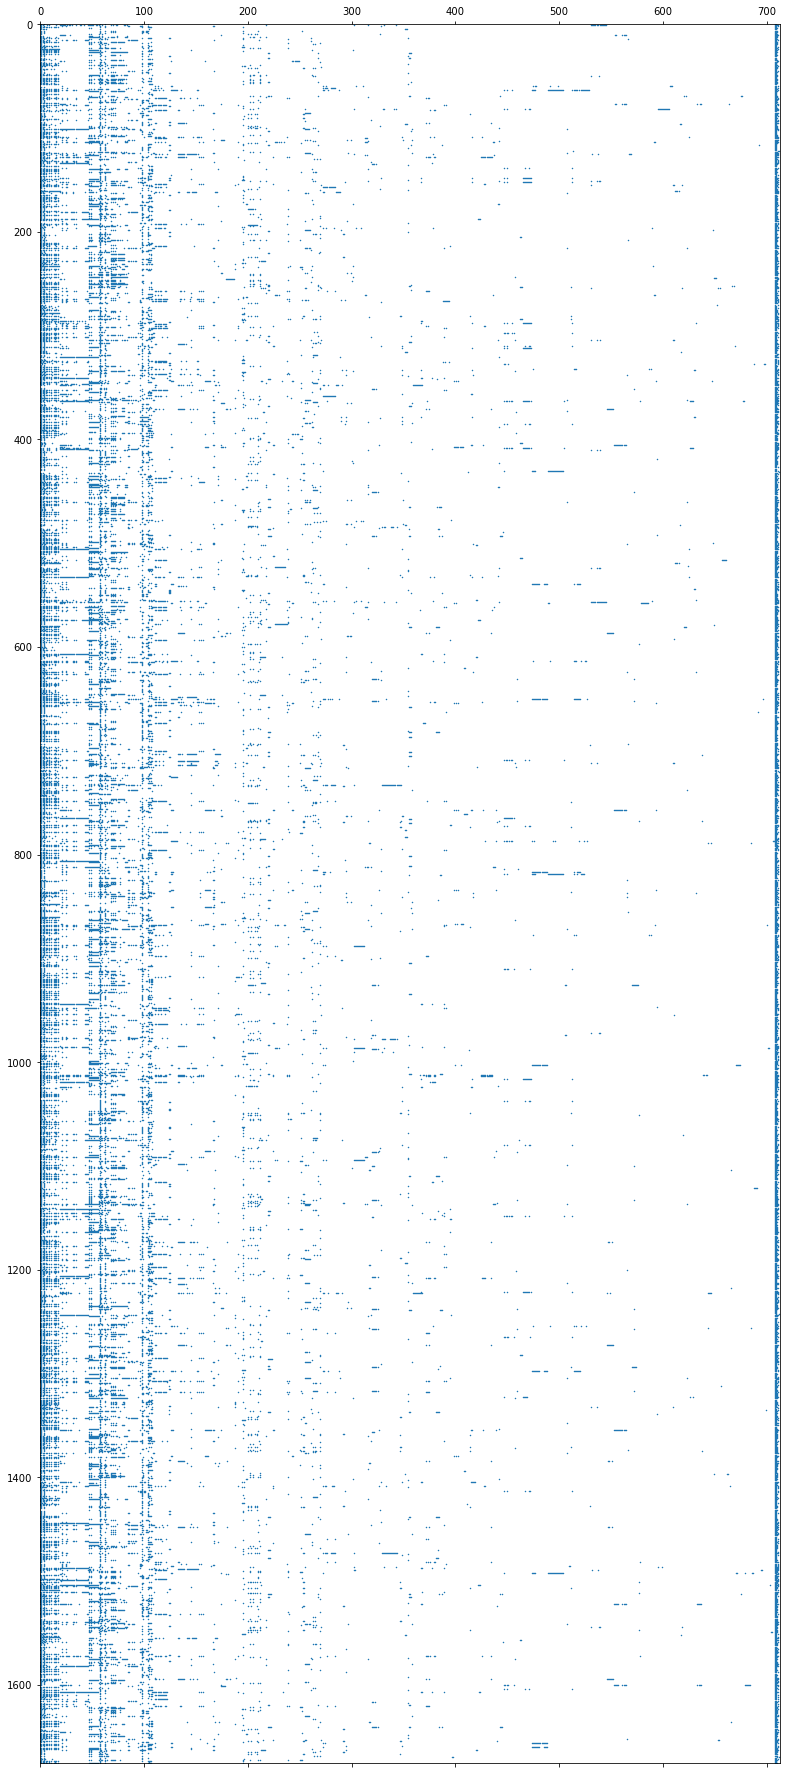

In [4]:
plt.figure(figsize=(20, 32))
plt.spy(input, precision=0, markersize=0.5)
plt.show()

### What is the percentage of non-zero elements in table X

In [5]:
print("The percentage of non-zero elements in input is: {:.2f} %".format(np.count_nonzero(input) / input.size * 100))

The percentage of non-zero elements in input is: 2.98 %


### Explore the distribution of the output error we are predicting

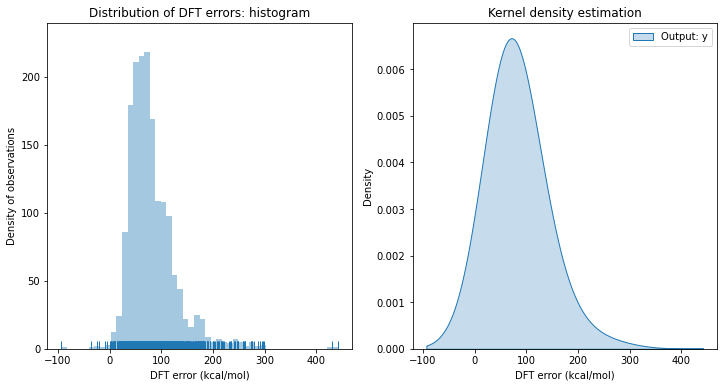

In [6]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
# Left plot: Histogram
sns.distplot(output, kde=False, norm_hist=False, rug=True, label="Output: y", ax=axes[0])
axes[0].set_title('Distribution of DFT errors: histogram')
axes[0].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Count of observations')

# Right plot: Kernel Density Estimation
sns.kdeplot(output, shade=True, clip=(output.min(),output.max()), bw_method=1, label="Output: y", ax=axes[1])
axes[1].set_title('Kernel density estimation')
axes[1].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Density of observations')
plt.legend()
plt.show()

### Split X and y in training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.5, random_state=1)

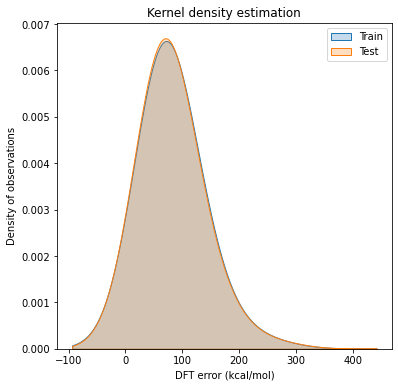

In [8]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
# Train and Test: Kernel Density Estimation
sns.kdeplot(y_train, shade=True, clip=(output.min(),output.max()), bw_method=1, label="Train")
sns.kdeplot(y_test, shade=True, clip=(output.min(),output.max()), bw_method=1, label="Test")
axes.set_title('Kernel density estimation')
axes.set_xlabel('DFT error (kcal/mol)')
axes.set_ylabel('Density of observations')
plt.legend()
plt.show()

### Create a Ridge regression model ( 𝐿2  regularization and alpha = 2)

In [9]:
model_L2 = linear_model.Ridge(alpha=2.0)
# Fit the model
model_L2.fit(X_train, y_train)
Train_Error_L2 = np.mean(abs(model_L2.predict(X_train) - y_train))
Test_Error_L2 = np.mean(abs(model_L2.predict(X_test) - y_test))
Model_Coeff_L2 = model_L2.coef_
NonZeroCoeff_L2 = input.shape[1] - (model_L2.coef_ == 0).sum()

### Compute Completeness

In [10]:
completeness = []
X_train_R = pd.DataFrame(X_train, columns=input.columns)
for i in range(len(X_train_R.columns)):
    completeness.append(np.count_nonzero(X_train_R.iloc[:,i]) / len(X_train_R.iloc[:,i]) * 100)

### Plot the figure - Completeness vs Feature Importance

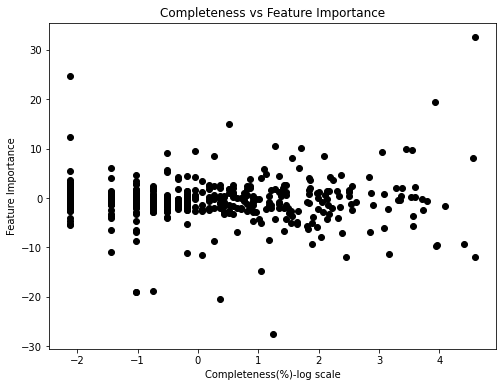

In [11]:
plt.figure(figsize=(8,6))
log_completeness = np.log(completeness)
plt.plot(log_completeness, Model_Coeff_L2, 'o', color='black')
plt.xlabel('Completeness(%)-log scale')
plt.ylabel('Feature Importance')
plt.title('Completeness vs Feature Importance')
plt.show()

### Comment

Based on the completeness-feature importance graph provided, we can see that there is no significant correlation between the completeness of the dataset and the feature importance of the Ridge model. The points are evenly distributed around feature importance = 0.

Despite this, we did observe that as the completeness of the dataset increased, the points were less likely to fall into the range of feature importance below -20. Additionally, in some instances where the log-completeness exceeded 4, the feature importance surpassed 30.

Therefore, it is still recommended to redesign the dataset by prioritizing features with higher completeness, as these features have a greater likelihood of having higher feature importance.